In [14]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load Data
transaction_data = pd.read_excel(r"C:\Users\ashwi\Downloads\QVI_transaction_data.xlsx")
purchase_behaviour_data = pd.read_csv(r"C:\Users\ashwi\Downloads\QVI_purchase_behaviour.csv")


In [16]:
# Data Inspection
print("Transaction Data Info:")
print(transaction_data.info())
print("\nPurchase Behaviour Data Info:")
print(purchase_behaviour_data.info())

# Checking for missing values
print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum())
print("\nMissing Values in Purchase Behaviour Data:")
print(purchase_behaviour_data.isnull().sum())


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None

Purchase Behaviour Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUS

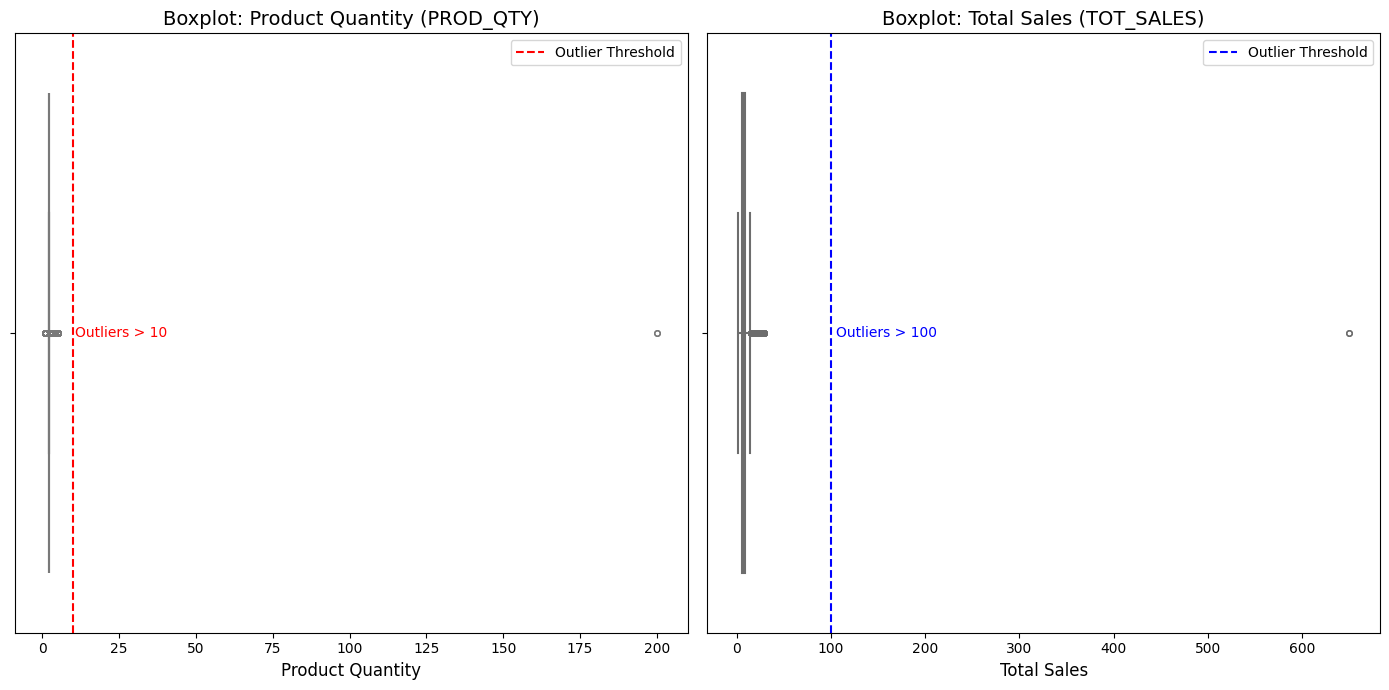

In [17]:
# Outlier Detection
# Define figure size and layout
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Boxplot for Product Quantity (PROD_QTY)
sns.boxplot(data=transaction_data, x='PROD_QTY', ax=axes[0], color='lightblue', fliersize=4, linewidth=1.5)
axes[0].set_title('Boxplot: Product Quantity (PROD_QTY)', fontsize=14)
axes[0].set_xlabel('Product Quantity', fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Highlighting the outlier area
axes[0].axvline(10, color='red', linestyle='--', linewidth=1.5, label='Outlier Threshold')
axes[0].legend(fontsize=10)
axes[0].text(10.5, 0, 'Outliers > 10', color='red', fontsize=10, verticalalignment='center')

# Boxplot for Total Sales (TOT_SALES)
sns.boxplot(data=transaction_data, x='TOT_SALES', ax=axes[1], color='salmon', fliersize=4, linewidth=1.5)
axes[1].set_title('Boxplot: Total Sales (TOT_SALES)', fontsize=14)
axes[1].set_xlabel('Total Sales', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Highlighting the outlier area
axes[1].axvline(100, color='blue', linestyle='--', linewidth=1.5, label='Outlier Threshold')
axes[1].legend(fontsize=10)
axes[1].text(105, 0, 'Outliers > 100', color='blue', fontsize=10, verticalalignment='center')

# Adjust spacing
plt.tight_layout()
plt.show()

In [18]:
# Removing Outliers
outlier_transactions = transaction_data[(transaction_data['PROD_QTY'] > 10) | (transaction_data['TOT_SALES'] > 100)]
print("\nOutlier Transactions:")
print(outlier_transactions)

# Removing outliers from transaction data
transaction_data_cleaned = transaction_data[~transaction_data['TXN_ID'].isin(outlier_transactions['TXN_ID'])]


Outlier Transactions:
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [19]:
# Feature Engineering
# Extracting Pack Size
transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)g').astype(float)

# Extracting Brand
transaction_data_cleaned['BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

C:\Users\ashwi\AppData\Local\Temp\ipykernel_27332\181266301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)g').astype(float)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_27332\181266301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]


In [20]:
# Merge Data
merged_data = pd.merge(
    transaction_data_cleaned,
    purchase_behaviour_data,
    on="LYLTY_CARD_NBR",
    how="inner"
)

# Exploratory Data Analysis
# Summary statistics
print("\nMerged Data Info:")
print(merged_data.info())
print("\nSummary Statistics:")
print(merged_data.describe(include='all'))


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264834 non-null  int64  
 1   STORE_NBR         264834 non-null  int64  
 2   LYLTY_CARD_NBR    264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         258770 non-null  float64
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 24.2+ MB
None

Summary Statistics:
                 DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   264834.000000  264834.000000   


Sales by Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   80658.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstream   

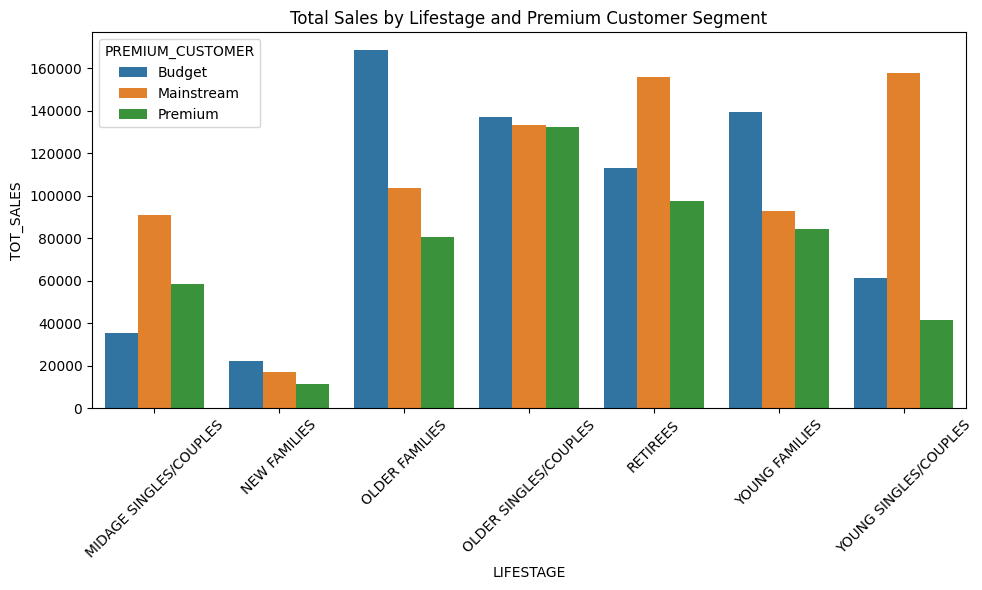

In [21]:
# Sales by Lifestage and Premium Segment
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print("\nSales by Segment:")
print(sales_by_segment)

# Visualizing Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pack Size Sales Summary:
    PACK_SIZE  TOT_SALES
0        70.0     6852.0
1        90.0     9676.4
2       110.0   162765.4
3       125.0     5733.0
4       134.0   177655.5
5       135.0    26090.4
6       150.0   296609.7
7       160.0    10647.6
8       165.0   101360.6
9       170.0   146673.0
10      175.0   477112.4
11      180.0     8568.4
12      190.0    14412.9
13      200.0    16007.5
14      210.0    21700.8
15      220.0     6831.0
16      250.0    26096.7
17      270.0    55425.4
18      300.0   113330.6
19      330.0   136794.3
20      380.0    75419.6


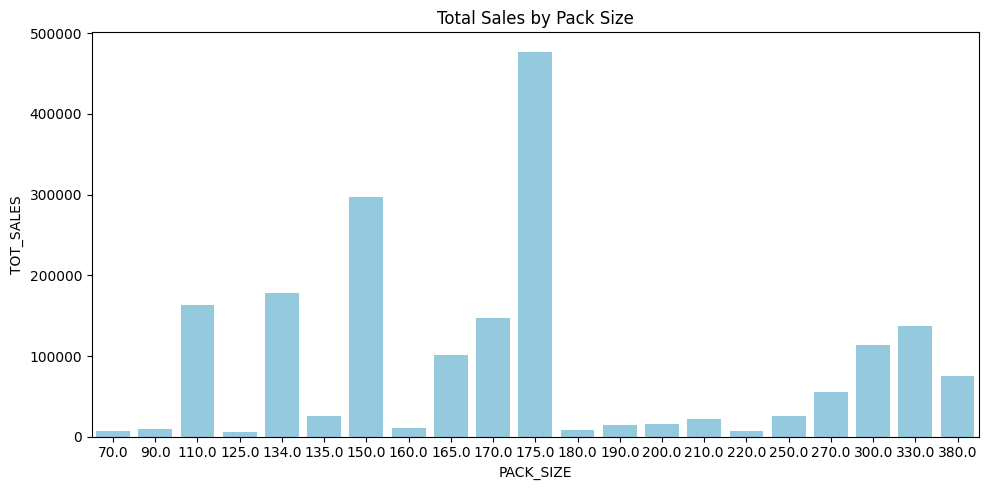

In [22]:
# Pack Size Analysis
pack_size_sales = merged_data.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()
print("\nPack Size Sales Summary:")
print(pack_size_sales)

plt.figure(figsize=(10, 5))
sns.barplot(data=pack_size_sales, x='PACK_SIZE', y='TOT_SALES', color='skyblue')
plt.title('Total Sales by Pack Size')
plt.tight_layout()
plt.show()

In [23]:
# Recommendations
print("\nRecommendations:")
print("""
1. Target Lifestage segments with high total sales for promotional campaigns.
2. Focus on premium customers who contribute significantly to revenue.
3. Optimize stock levels for popular pack sizes.
4. Consider diversifying brand offerings based on customer preferences.
""")


Recommendations:

1. Target Lifestage segments with high total sales for promotional campaigns.
2. Focus on premium customers who contribute significantly to revenue.
3. Optimize stock levels for popular pack sizes.
4. Consider diversifying brand offerings based on customer preferences.



In [24]:
# Saving Analysis
merged_data.to_csv('cleaned_merged_data.csv', index=False)